# <img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Nombre y Apellido
_Carlos Leonardo Urrego_
***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [2]:

def genSen (fs, f0, N, A, phase):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    A:     amplitud pico de la señal [V]
    phase:  fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función
    
    # tiempo de muestreo
    Ts = 1/fs

    # Se crea una lista para la base de tiempo y se convierte en array numérico
    tt =   np.asarray( [n/fs  for n in range(N)] )

    #Se Genera la Señal
    signal = A * np.sin(2 * np.pi * f0 * tt + phase)
    
    
    # fin de la función
    
    return tt, signal


In [3]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy.fftpack as sc
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################
def genSen( fs , f0 , N , A , phase ):
    """
    brief:  Generador de señales senoidal, con argumentos

    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    A:      amplitud pico de la señal [V]
    phase:  fase de la señal sinusoidal [rad]

    como resultado la señal devuelve:

    signal: senoidal evaluada en cada instante
    tt:     base de tiempo de la señal
    """

    # tiempo de muestreo
    Ts = 1/fs

    # Se crea una lista para la base de tiempo y se convierte en array numerico
    tt =   np.asarray( [n/fs  for n in range(N)] )

    #Se Genera la Señal
    signal = A * np.sin(2 * np.pi * f0 * tt + phase)

    return tt , signal

In [16]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


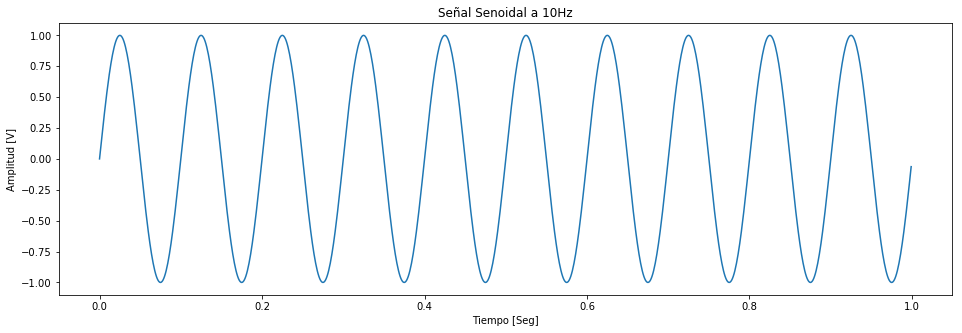

In [17]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz


# Insertar aquí el código para generar y visualizar la señal
##############################################################
[ tt , signal ] = genSen( fs , f0 , N , a0 , p0 )

titleImg = 'Señal Senoidal a ' + str(f0) + 'Hz'

#%% Presentación gráfica de los resultados
plt.figure(1 , figsize=(16,5))
plt.plot( tt , signal )
plt.title( titleImg )
plt.xlabel( 'Tiempo [Seg]' )
plt.ylabel( 'Amplitud [V]' )
#    plt.grid(which='both', axis='both')
plt.show()

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, por el numero de crestas, son 10 en 1 seg, es decir, 10 Hz.
</div>

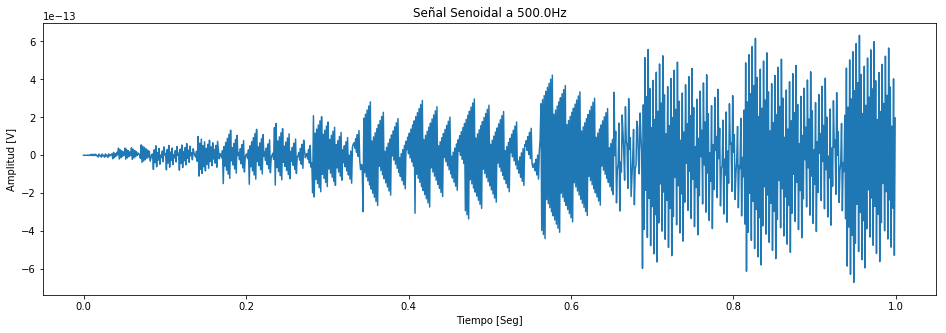

In [6]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
[ tt , signal ] = genSen( fs , f0 , N , a0 , p0 )

titleImg = 'Señal Senoidal a ' + str(f0) + 'Hz'

#%% Presentación gráfica de los resultados
plt.figure(1 , figsize=(16,5))
plt.plot( tt , signal )
plt.title( titleImg )
plt.xlabel( 'Tiempo [Seg]' )
plt.ylabel( 'Amplitud [V]' )
plt.show()

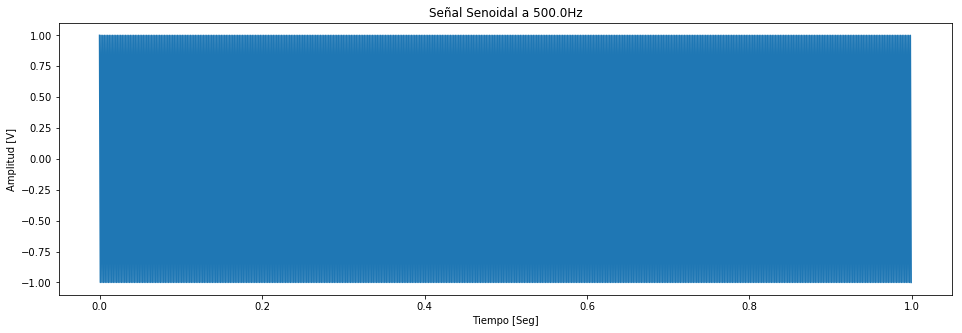

In [7]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
[ tt , signal ] = genSen( fs , f0 , N , a0 , p0 )

titleImg = 'Señal Senoidal a ' + str(f0) + 'Hz'

#%% Presentación gráfica de los resultados
plt.figure(1 , figsize=(16,5))
plt.plot( tt , signal )
plt.title( titleImg )
plt.xlabel( 'Tiempo [Seg]' )
plt.ylabel( 'Amplitud [V]' )
plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Teniendo como fuente, la forma de la señal no.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se debe a que la calidad de la imagen generada no precisa una forma para que visualmente se pueda hacer un análisis, tocaria modificar los valores del numero de muestras y frecuencia de samplin para cada caso en particular
</div>

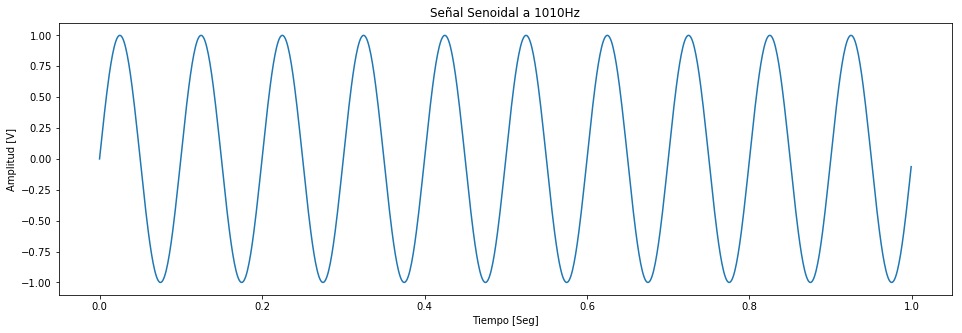

In [8]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
[ tt , signal ] = genSen( fs , f0 , N , a0 , p0 )

titleImg = 'Señal Senoidal a ' + str(f0) + 'Hz'

#%% Presentación gráfica de los resultados
plt.figure(1 , figsize=(16,5))
plt.plot( tt , signal )
plt.title( titleImg )
plt.xlabel( 'Tiempo [Seg]' )
plt.ylabel( 'Amplitud [V]' )
plt.show()

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No, a simple vista parece una señal de 10hz cuando realmente es de 1010Hz
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Que la frecuencia de sampling sea mayor al doble de la frecuencia de la señal (Nyquist)
</div>

<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

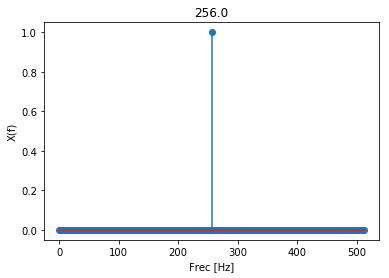

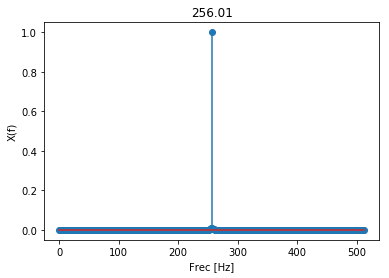

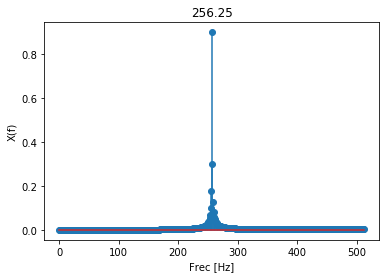

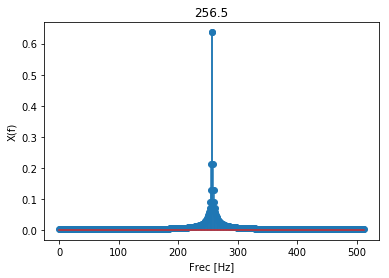

In [9]:
import numpy as np
import scipy.fftpack as sc

N = 1024
fs = 1024
f0 = fs//4
ts = 1/fs
fd = np.array( [0.0 , 0.01 , 0.25 , 0.5] )
numFreq = fd.size

# Base Temporal
tt = np.linspace( 0.0 , (N-1)*ts , N )
# Base frecuencial
ff = np.linspace( 0.0 , fs/2 , N/2 )

# Para almacenar los espectros
half_spc = np.zeros(( numFreq , ff.size ))

#calcula Los 4 Espectros
for i in range( numFreq ):
    signal = np.sin( 2 * np.pi * (f0 + fd[i]) * tt )
    #Espectro
    spc = sc.fft( signal )
    #Espectro Normalizado
    spc = np.abs( spc ) * ( 2/N )
    # La mitad del Espectro
    half_spc[i] = spc[:N//2]

#dibuja Los 4 Espectros
for i in range( numFreq ):
    plt.figure(i+1)
    plt.stem( ff , half_spc[i] )
    #plt.plot( tt , signal )
    plt.title( str(f0 + fd[i]) )
    plt.xlabel( 'Frec [Hz]' )
    plt.ylabel( 'X(f)' )
    plt.show()

In [10]:
from pandas import DataFrame
from IPython.display import HTML



#######################################
# Tu simulación que genere resultados #
#######################################

tablaRes = np.zeros(( numFreq ,3)) ## numFreq filas X 3 columnas

# Encuentra valor |X(f0)|
for i in range( numFreq ):
    tablaRes[i][0] = half_spc[i][ f0 ]
    tablaRes[i][0] = round( tablaRes[i][0] , 5 )
#    tablaRes[i][0] = float("{0:.4f}".format( half_spc[i][int(f0)] ))

# Encuentra valor |X(f0+1)|
for i in range( numFreq ):
    tablaRes[i][1] = half_spc[i][ f0+1 ]
    tablaRes[i][1] = round( tablaRes[i][1] , 5 )

# Encuentra valor sum() |X(f)|**2 - |X(f0)|**2 )
for i in range( numFreq ):
    X2 = np.power( half_spc[i] , 2)
    tablaRes[i][2] = X2.sum() - half_spc[i][ f0 ]**2
    tablaRes[i][2] = round( tablaRes[i][2] , 5 )

tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [tablaRes[0][0], tablaRes[0][1], tablaRes[0][2]], 
                  [tablaRes[1][0], tablaRes[1][1], tablaRes[1][2]], 
                  [tablaRes[2][0], tablaRes[2][1], tablaRes[2][2]], 
                  [tablaRes[3][0], tablaRes[3][1], tablaRes[3][2]] 
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1,0,0
$f_S/4+0.01$,0.99983,0.0101,0.00033
$f_S/4+0.25$,0.89963,0.3008,0.18969
$f_S/4+0.5$,0.63662,0.63662,0.59472


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

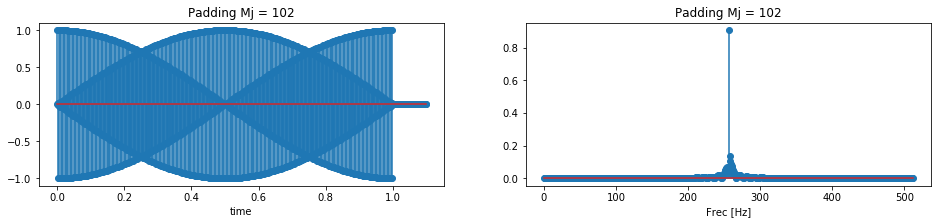

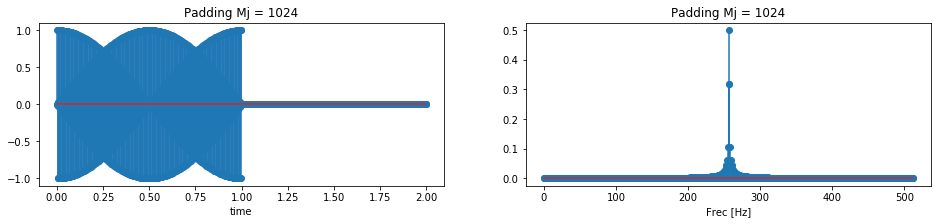

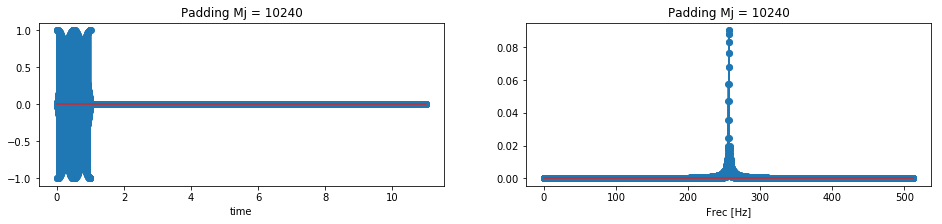

In [11]:
# Inserte aquí su código
Mj = np.array([ N//10 , N , N*10 ])

signal05 = np.sin( 2 * np.pi * (f0 + 0.5 ) * tt )

#calcula Los 3 Espectros
for i in range( Mj.size ):
    tt_zeros = np.linspace( 0.0 , (N + Mj[i] - 1)*ts , N + Mj[i] )
    ff_zeros = np.linspace( 0.0 , fs/2 , (N + Mj[i])/2 )
    
    #Señal
    signal_zeros = np.zeros( N + Mj[i] )
    signal_zeros[:N] = signal05
    
    #Espectro
    spc_zeros = sc.fft( signal_zeros )
    spc_zeros = np.abs( spc_zeros ) * ( 2/(N + Mj[i]) )  #Espectro Normalizado
    half_spc_zeros = spc_zeros[:(N + Mj[i])//2]    # La mitad del Espectro
    
    plt.figure(i+1 , figsize=(16,3) )
    
    # Dominio Temporal
    plt.subplot(1, 2, 1)
    plt.stem( tt_zeros , signal_zeros )
    plt.title( "Padding Mj = " + str(Mj[i]) )
    plt.xlabel( 'time' )

    # dominio espectral
    plt.subplot(1, 2, 2)
    plt.stem( ff_zeros , half_spc_zeros )
    #plt.plot( tt , signal )
    plt.title( "Padding Mj = " + str(Mj[i]) )
    plt.xlabel( 'Frec [Hz]' )
    plt.show()

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al insertar ceros en la señal, es como si el numero de muestras totales se aumentara, y pues como la  frecuencia de muestreo es la misma, la resolución se hace cada vez más chica, es por eso que en la última gráfica del espectro se puede apreciar como hay mas "puntos" aun cuando la frecuencia límite es la misma (512Hz).
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La señal original tenia una resolución espectral de 1Hz (1024/1024) , al agregar N/10 ceros (102) la resolusión espectral bajo a 0.9 (1024/1126), asi fue bajando hasta 0.09Hz . . . por lo que es posible ver mucho mejor la forma de la transformada y a su vez determinar con mayor precisión la frecuencia central de la señal.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [12]:
#######################################
# Tu simulación que genere resultados #
#######################################
Mj = np.array([ 0 , N//10 , N , N*10 ])

res3e = np.zeros(4)

#calcula el maximo
for i in range( Mj.size ):
    tt_zeros = np.linspace( 0.0 , (N + Mj[i] - 1)*ts , N + Mj[i] )
    ff_zeros = np.linspace( 0.0 , fs/2 , (N + Mj[i])/2 )
    
    #Señal
    signal_zeros = np.zeros( N + Mj[i] )
    signal_zeros[:N] = signal05
    
    #Espectro
    spc_zeros = sc.fft( signal_zeros )
    spc_zeros = np.abs( spc_zeros ) * ( 2/(N + Mj[i]) )  #Espectro Normalizado
    half_spc_zeros = spc_zeros[:(N + Mj[i])//2]    # La mitad del Espectro
    
    maxFreq = ff_zeros[ np.argmax( half_spc_zeros ) ]
    
    res3e[i] = (maxFreq/(f0+0.5))*100-100


tus_resultados = [res3e[0], # <-- acá debería haber numeritos :)
                  res3e[1], # <-- acá debería haber numeritos :)
                  res3e[2], # <-- acá debería haber numeritos :)
                  res3e[3] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,0.391008
$N/10$,0.160246
$N$,0.097752
$10N$,0.035483
